# Libraries

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [156]:
from sklearn.metrics import r2_score as r2_score_metric, mean_squared_error, mean_absolute_error
import numpy as np

def regression_report(y_true, y_pred):
    """Print key regression metrics and return the r2 score."""
    r2 = r2_score_metric(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"R2 Score: {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    return r2


In [157]:
from sklearn.impute import SimpleImputer


In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [159]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [160]:
try:
    from imblearn.over_sampling import SMOTE
except ImportError:  # install if needed
    import sys
    !{sys.executable} -m pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.base import clone



# EDA

In [161]:
import pandas as pd

# Try to use openpyxl explicitly for reading Excel files
try:
    df = pd.read_excel("Rangpur drought.xlsx", engine='openpyxl')
except ImportError as e:
    print("The 'openpyxl' library is required to read Excel files. Please install it using pip:\n\n    pip install openpyxl")
    raise e

# Keep only the records that contain the full hydro-meteorological context
if 'Year' in df.columns:
    df = df[df['Year'].notna()].reset_index(drop=True)

# Drop the Rainfall column because it is entirely empty in this dataset
if 'Rainfall' in df.columns and df['Rainfall'].isna().all():
    df = df.drop(columns=['Rainfall'])

# Remove any residual incomplete rows for the modelling features
required_cols = ['Humidity', 'Min Temp', 'Max Temp', 'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']
df = df.dropna(subset=[col for col in required_cols if col in df.columns]).reset_index(drop=True)

df.head()

,Year,Month,Humidity,Min Temp,Max Temp,Solar Radiation,Sunshine,PET,Precepitition,SPEI-1,SPEI-3,SPEI-6,SPEI-9,SPEI-12
0,1990.0,1.0,84.00,11.60,24.23,125.51,6.20,18.14,1.0,-1.262278,0.000000,0.0,0.0,0.0
1,1990.0,2.0,76.29,13.89,25.43,129.36,6.58,20.30,57.0,1.507233,0.000000,0.0,0.0,0.0
2,1990.0,3.0,72.52,16.52,27.95,146.21,7.23,26.88,82.0,1.667062,1.816228,0.0,0.0,0.0
3,1990.0,4.0,79.20,20.51,29.37,164.72,6.24,29.49,134.0,0.844219,1.711505,0.0,0.0,0.0
4,1990.0,5.0,83.03,23.68,31.84,143.77,6.81,27.46,354.0,0.857969,1.548284,0.0,0.0,0.0


In [162]:
df.tail()

,Year,Month,Humidity,Min Temp,Max Temp,Solar Radiation,Sunshine,PET,Precepitition,SPEI-1,SPEI-3,SPEI-6,SPEI-9,SPEI-12
391,2022.0,8.0,80.32,26.77,34.07,135.40,5.65,25.77,309.0,-0.538609,-0.806184,-0.706217,-0.506752,-0.696672
392,2022.0,9.0,84.20,26.04,32.82,138.47,4.34,24.68,164.0,-1.149704,-1.659237,-0.912190,-0.914815,-0.624512
393,2022.0,10.0,79.94,23.65,32.04,152.24,6.74,22.81,73.0,-0.915813,-1.449978,-1.355991,-1.091880,-1.172347
394,2022.0,11.0,76.83,18.44,30.09,137.20,8.65,20.99,0.0,-2.055389,-1.740311,-1.373583,-1.328967,-1.189064
395,2022.0,12.0,80.77,14.74,26.55,168.57,5.12,26.15,0.0,-1.338666,-1.531049,-1.823394,-1.213716,-1.206298


In [163]:
print(df.columns)

Index(['Year', 'Month', 'Humidity', 'Min Temp', 'Max Temp', 'Solar Radiation',
       'Sunshine', 'PET', 'Precepitition', 'SPEI-1', 'SPEI-3', 'SPEI-6',
       'SPEI-9', 'SPEI-12'],
      dtype='object')


In [164]:
print(df.describe())

             Year       Month    Humidity    Min Temp    Max Temp  \
count   396.00000  396.000000  396.000000  396.000000  396.000000   
mean   2006.00000    6.500000   80.457980   20.433889   29.766818   
std       9.53395    3.456419    5.684693    5.342417    3.258428   
min    1990.00000    1.000000   61.580000    9.070000   20.270000   
25%    1998.00000    3.750000   77.612500   15.665000   27.980000   
50%    2006.00000    6.500000   81.295000   22.085000   31.055000   
75%    2014.00000    9.250000   84.620000   25.462500   32.142500   
max    2022.00000   12.000000   90.300000   27.310000   34.750000   

       Solar Radiation    Sunshine         PET  Precepitition      SPEI-1  \
count       396.000000  396.000000  396.000000     396.000000  396.000000   
mean        177.109040    5.981364   38.544924     181.148990    0.006228   
std          35.688189    1.634185   12.075606     202.872275    0.979938   
min          73.090000    1.730000   12.440000       0.000000   -2.379

In [165]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             396 non-null    float64
 1   Month            396 non-null    float64
 2   Humidity         396 non-null    float64
 3   Min Temp         396 non-null    float64
 4   Max Temp         396 non-null    float64
 5   Solar Radiation  396 non-null    float64
 6   Sunshine         396 non-null    float64
 7   PET              396 non-null    float64
 8   Precepitition    396 non-null    float64
 9   SPEI-1           396 non-null    float64
 10  SPEI-3           396 non-null    float64
 11  SPEI-6           396 non-null    float64
 12  SPEI-9           396 non-null    float64
 13  SPEI-12          396 non-null    float64
dtypes: float64(14)
memory usage: 43.4 KB
None


# Preprocessing

In [166]:
feature_columns = ['Humidity', 'Min Temp', 'Max Temp', 'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']
features = df[feature_columns].copy()
targets = df['SPEI-12']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


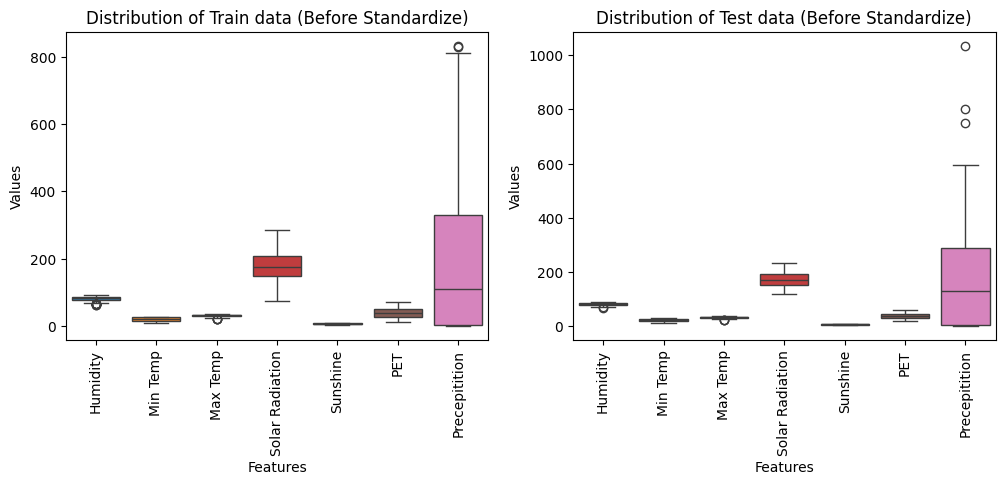

In [168]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(X_train)
plt.title("Distribution of Train data (Before Standardize)")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.subplot(1, 2, 2)
sns.boxplot(X_test)
plt.title("Distribution of Test data (Before Standardize)")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.show()

In [169]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
X_Train = scaler.fit_transform(features)
y_Train = targets

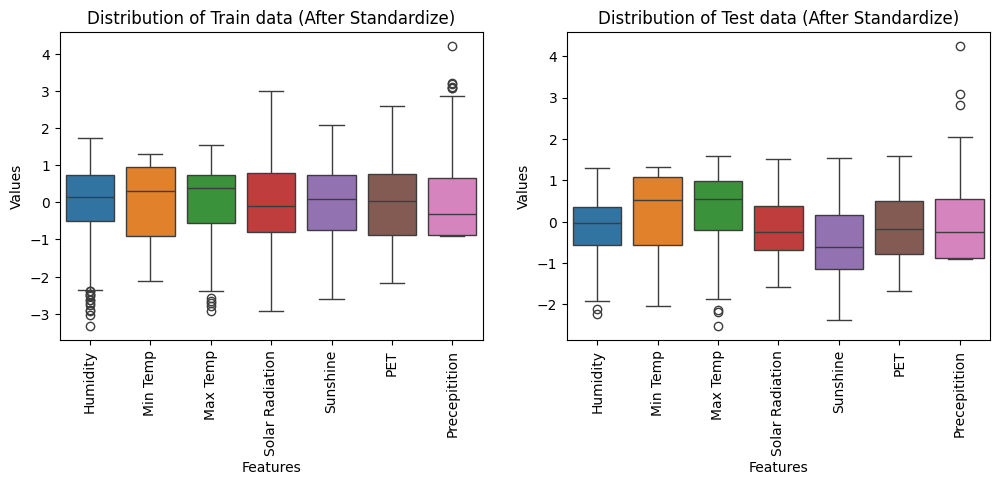

In [171]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(X_Train)
plt.title("Distribution of Train data (After Standardize)")
plt.xticks(ticks=range(len(features.columns)), labels=features.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("Values")
plt.subplot(1, 2, 2)
sns.boxplot(X_test)
plt.title("Distribution of Test data (After Standardize)")
plt.xlabel("Features")
plt.xticks(ticks=range(len(features.columns)), labels=features.columns, rotation=90)
plt.ylabel("Values")
plt.show()

# Linear Reg

In [172]:
linear_model = LinearRegression()
linear_model.fit(X_Train, y_Train)
y_pred = linear_model.predict(X_test)

In [173]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: -0.1755
Root Mean Squared Error (RMSE): 1.0047
Mean Absolute Error (MAE): 0.8088
Accuracy Score: -0.1755


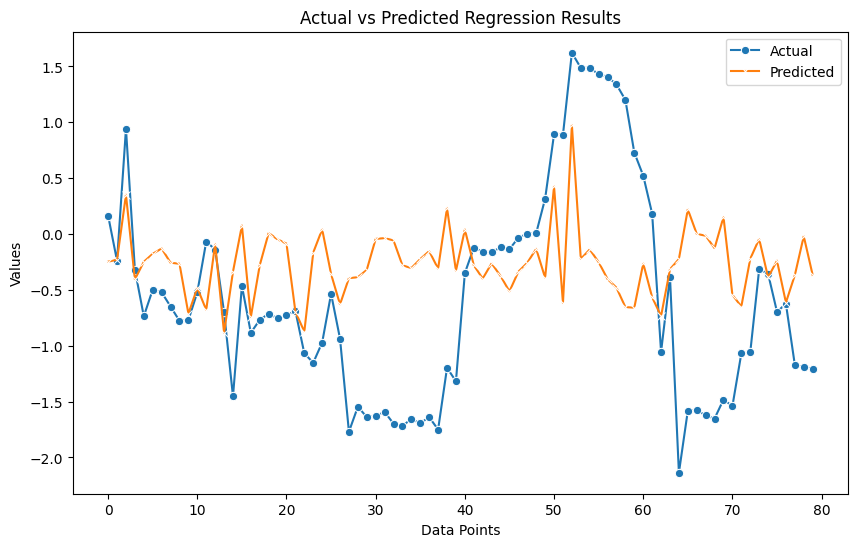

In [174]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# Random Forest

In [175]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_Train, y_Train)
y_pred = random_forest_model.predict(X_test)

In [176]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: 0.5030
Root Mean Squared Error (RMSE): 0.6533
Mean Absolute Error (MAE): 0.5217
Accuracy Score: 0.5030


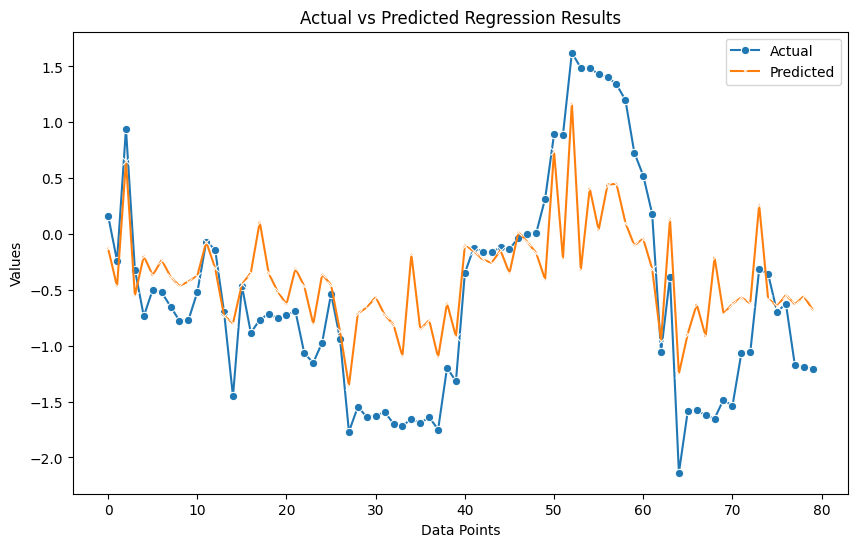

In [177]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# Decision Tree

In [178]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_Train, y_Train)
y_pred = decision_tree_model.predict(X_test)

In [179]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: 0.1376
Root Mean Squared Error (RMSE): 0.8606
Mean Absolute Error (MAE): 0.3986
Accuracy Score: 0.1376


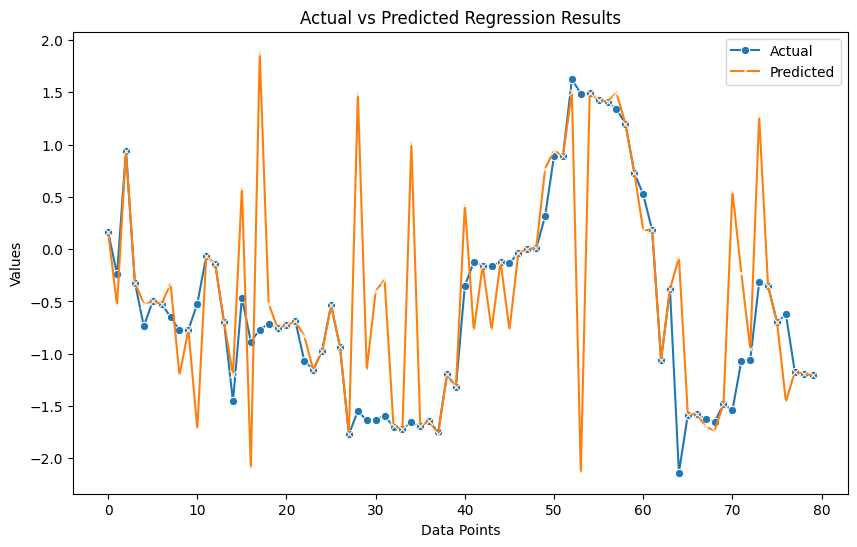

In [180]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SVR

In [181]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_Train, y_Train)
y_pred = svr_model.predict(X_test)

In [182]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: -0.1308
Root Mean Squared Error (RMSE): 0.9855
Mean Absolute Error (MAE): 0.7865
Accuracy Score: -0.1308


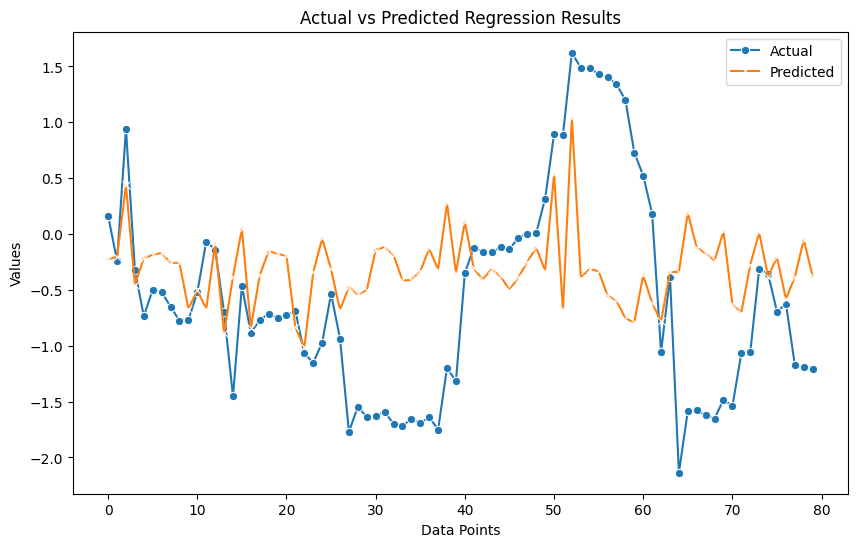

In [183]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# KNN

In [184]:
kneighbors_model = KNeighborsRegressor(n_neighbors=5)
kneighbors_model.fit(X_Train, y_Train)
y_pred = kneighbors_model.predict(X_test)

In [185]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: -0.0021
Root Mean Squared Error (RMSE): 0.9277
Mean Absolute Error (MAE): 0.7373
Accuracy Score: -0.0021


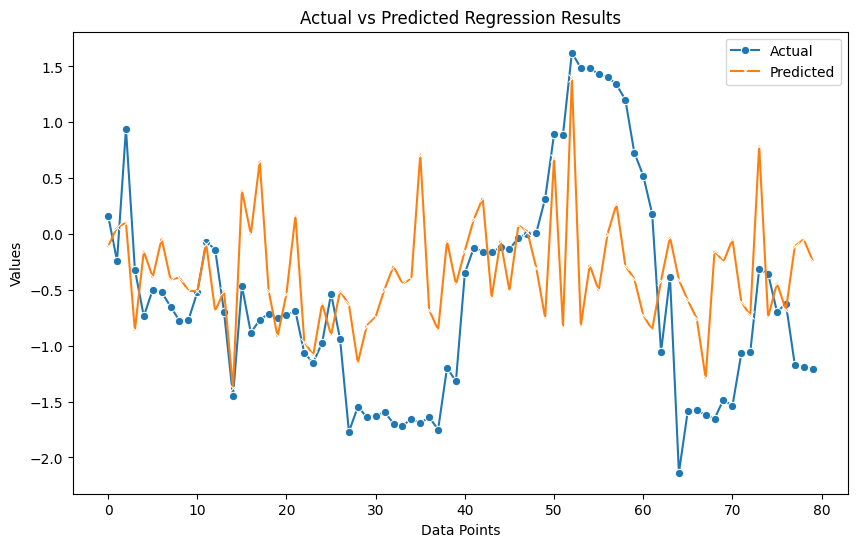

In [186]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# ANN

In [187]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


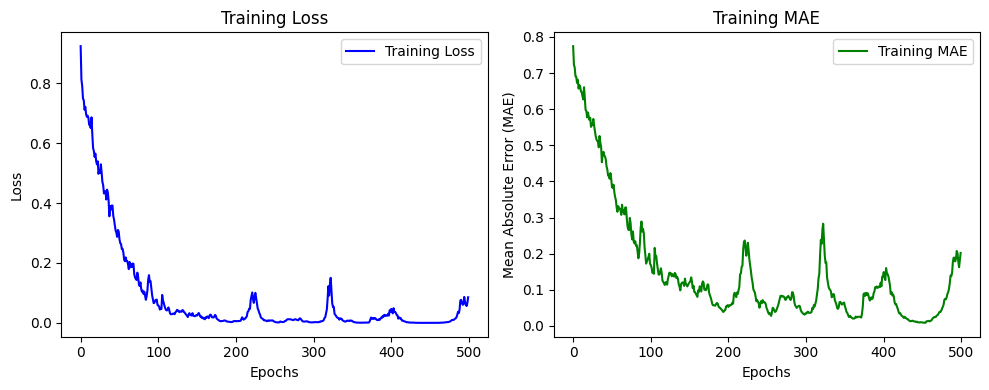

In [188]:
# Retrieve training history
history_dict = history.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [189]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [190]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: 0.9380
Root Mean Squared Error (RMSE): 0.2308
Mean Absolute Error (MAE): 0.1615
Accuracy Score: 0.9380


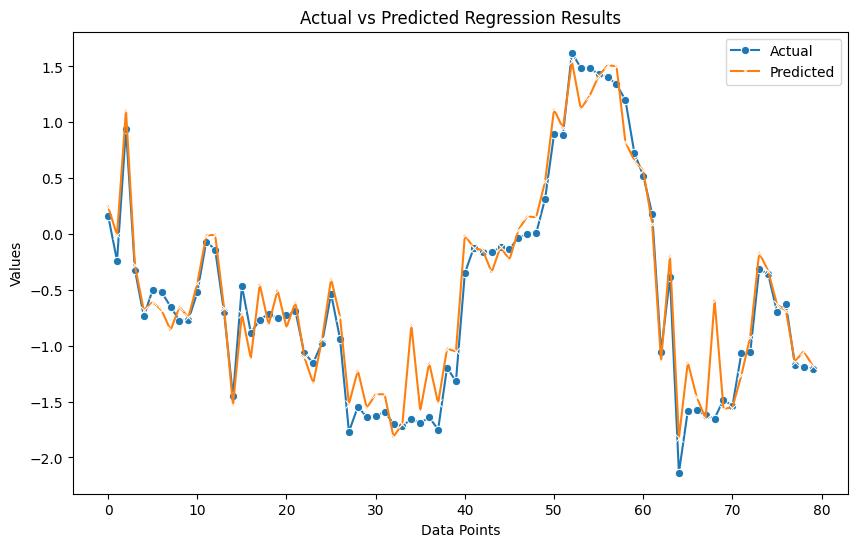

In [191]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-1

In [192]:
features = df[feature_columns].copy()
targets = df['SPEI-1']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [194]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [195]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [196]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi1 = model1.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


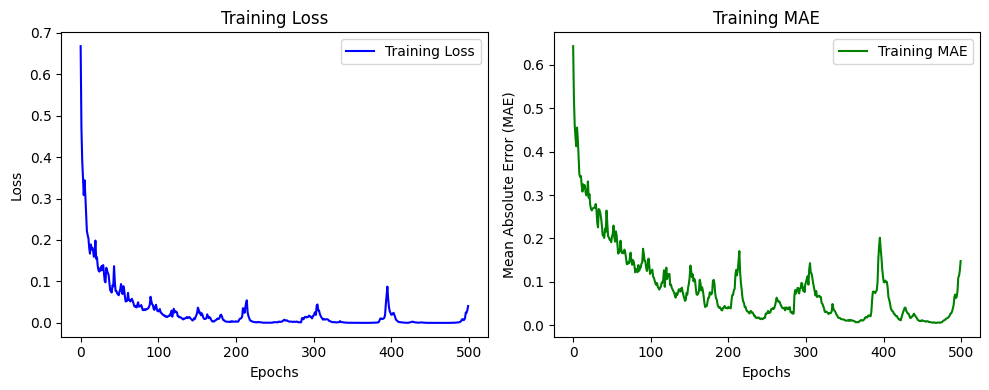

In [197]:
# Retrieve training history
history_dict = history_spi1.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [198]:
y_pred = model1.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score1 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score1:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
R2 Score: 0.9777
Root Mean Squared Error (RMSE): 0.1619
Mean Absolute Error (MAE): 0.1181
Accuracy Score: 0.9777


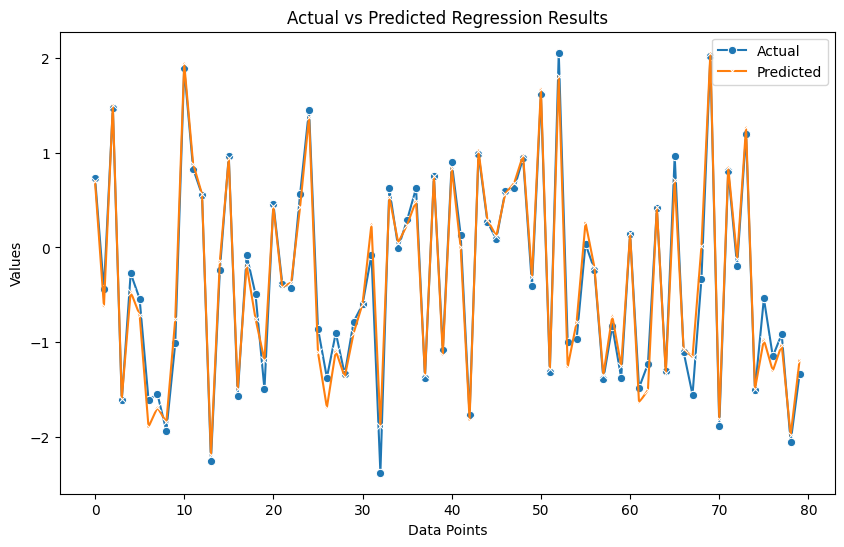

In [199]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-3

In [200]:
features = df[feature_columns].copy()
targets = df['SPEI-3']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [202]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [204]:
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi3 = model3.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


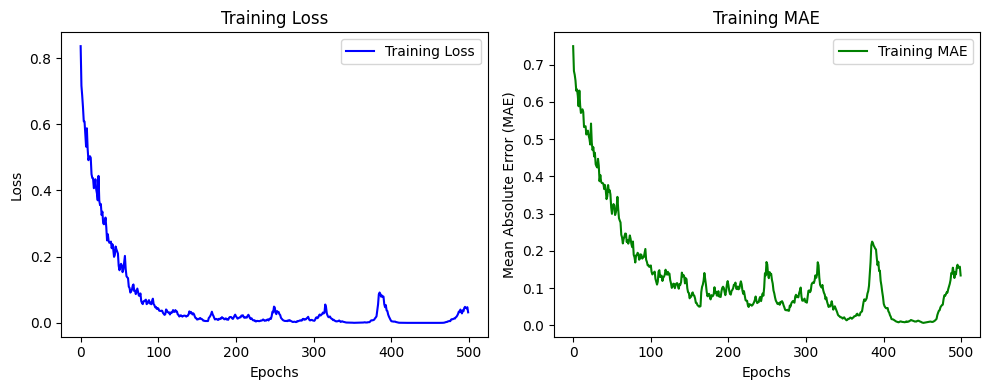

In [205]:
# Retrieve training history
history_dict = history_spi3.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [206]:
y_pred = model3.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score3 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score3:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
R2 Score: 0.9593
Root Mean Squared Error (RMSE): 0.2019
Mean Absolute Error (MAE): 0.1393
Accuracy Score: 0.9593


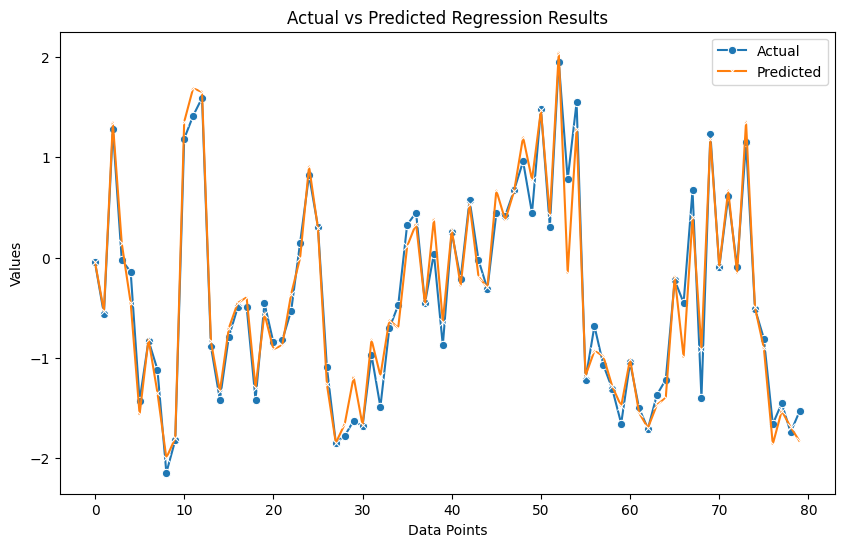

In [207]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-6

In [208]:
features = df[feature_columns].copy()
targets = df['SPEI-6']

In [209]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [210]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [211]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [212]:
model6 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model6.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi6 = model6.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


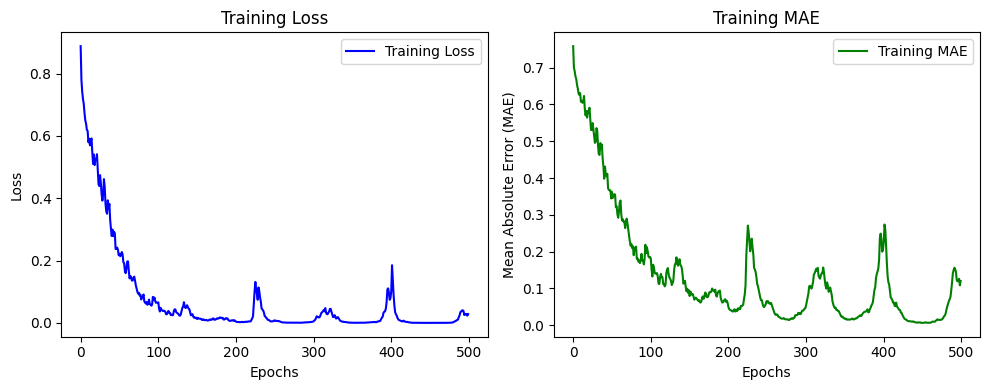

In [213]:
# Retrieve training history
history_dict = history_spi6.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [214]:
y_pred = model6.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score6 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score6:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
R2 Score: 0.9402
Root Mean Squared Error (RMSE): 0.2435
Mean Absolute Error (MAE): 0.1689
Accuracy Score: 0.9402


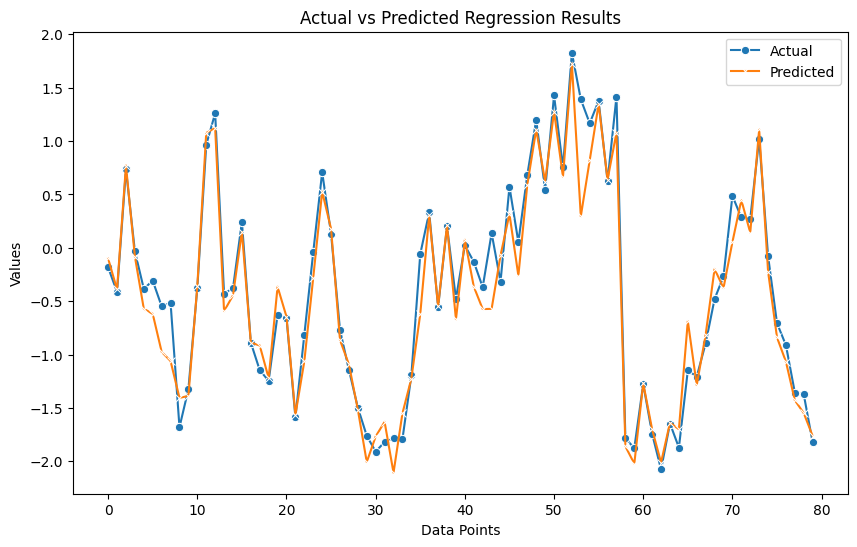

In [215]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-9

In [216]:
features = df[feature_columns].copy()
targets = df['SPEI-9']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [218]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [219]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [220]:
model9 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model9.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi9 = model9.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


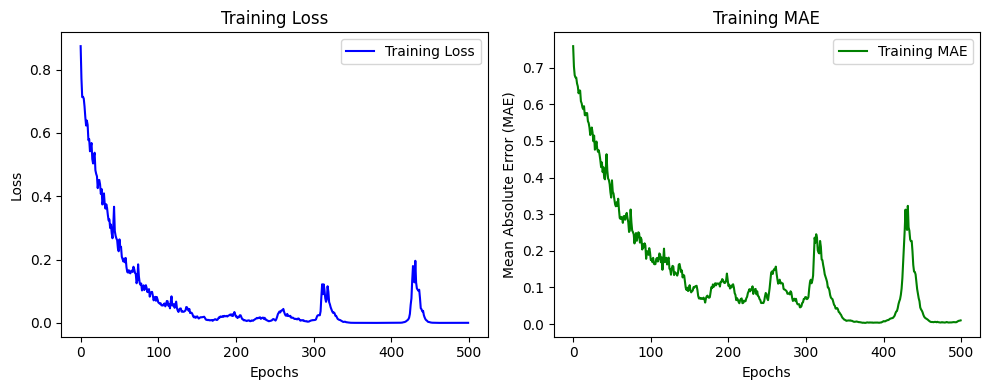

In [221]:
# Retrieve training history
history_dict = history_spi9.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [222]:
y_pred = model9.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score9 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score9:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
R2 Score: 0.9491
Root Mean Squared Error (RMSE): 0.2149
Mean Absolute Error (MAE): 0.1293
Accuracy Score: 0.9491


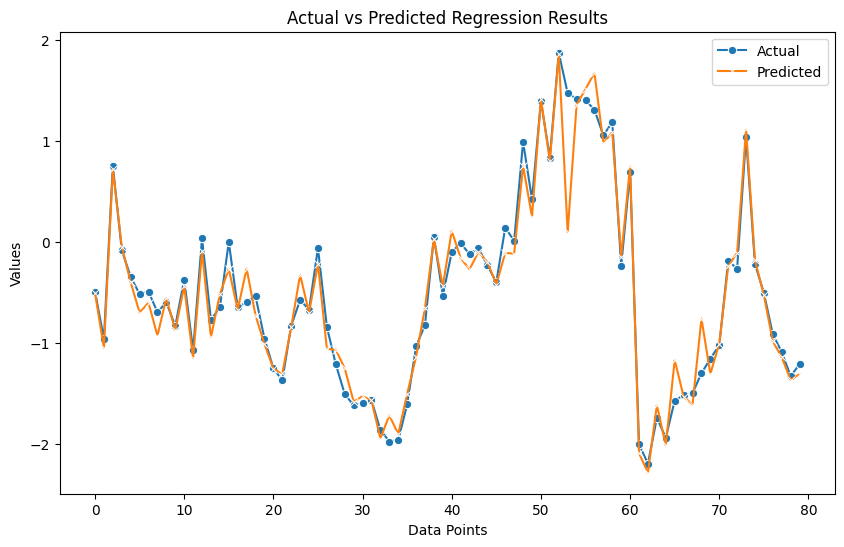

In [223]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-12

In [224]:
features = df[feature_columns].copy()
targets = df['SPEI-12']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [226]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [227]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [228]:
model12 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model12.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi12 = model12.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


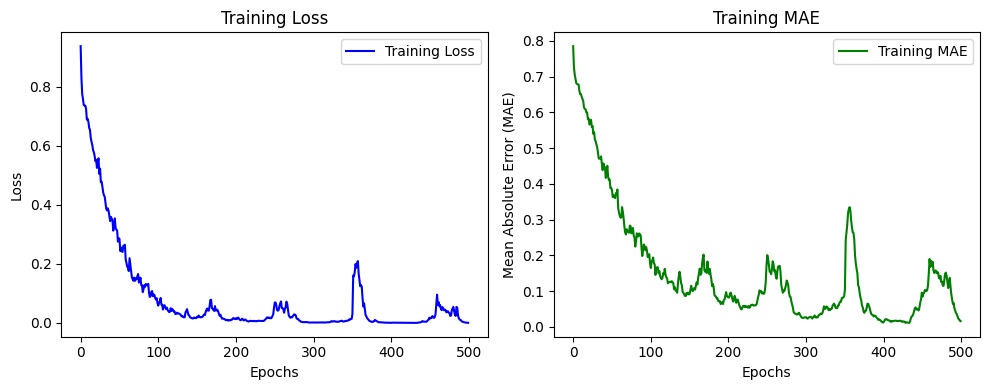

In [229]:
# Retrieve training history
history_dict = history_spi12.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [230]:
y_pred = model12.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score12 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score12:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
R2 Score: 0.9574
Root Mean Squared Error (RMSE): 0.1912
Mean Absolute Error (MAE): 0.1222
Accuracy Score: 0.9574


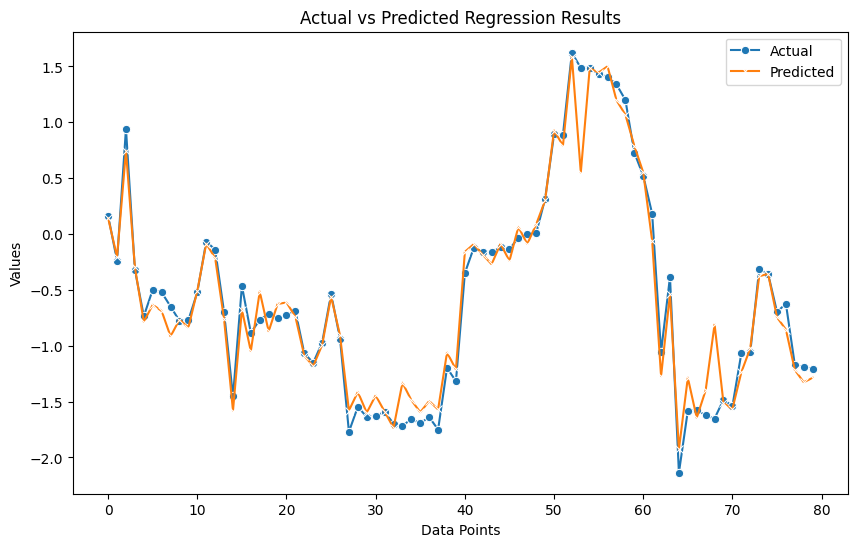

In [231]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# Summary

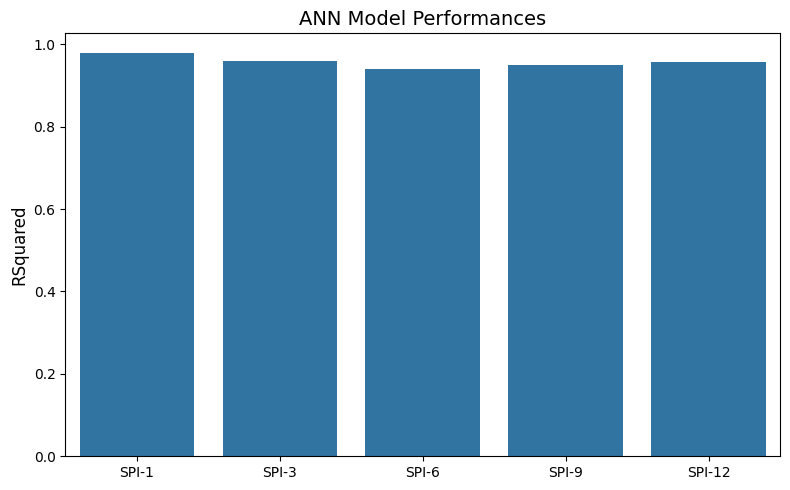

In [232]:
categories = ['SPI-1', 'SPI-3', 'SPI-6', 'SPI-9', 'SPI-12']
values = [accuracy_score1, accuracy_score3, accuracy_score6, accuracy_score9, accuracy_score12]

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=values)

# Add title and labels
plt.title('ANN Model Performances', fontsize=14)
plt.ylabel('RSquared', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## new approach


In [233]:
df.head()

,Year,Month,Humidity,Min Temp,Max Temp,Solar Radiation,Sunshine,PET,Precepitition,SPEI-1,SPEI-3,SPEI-6,SPEI-9,SPEI-12
0,1990.0,1.0,84.00,11.60,24.23,125.51,6.20,18.14,1.0,-1.262278,0.000000,0.0,0.0,0.0
1,1990.0,2.0,76.29,13.89,25.43,129.36,6.58,20.30,57.0,1.507233,0.000000,0.0,0.0,0.0
2,1990.0,3.0,72.52,16.52,27.95,146.21,7.23,26.88,82.0,1.667062,1.816228,0.0,0.0,0.0
3,1990.0,4.0,79.20,20.51,29.37,164.72,6.24,29.49,134.0,0.844219,1.711505,0.0,0.0,0.0
4,1990.0,5.0,83.03,23.68,31.84,143.77,6.81,27.46,354.0,0.857969,1.548284,0.0,0.0,0.0


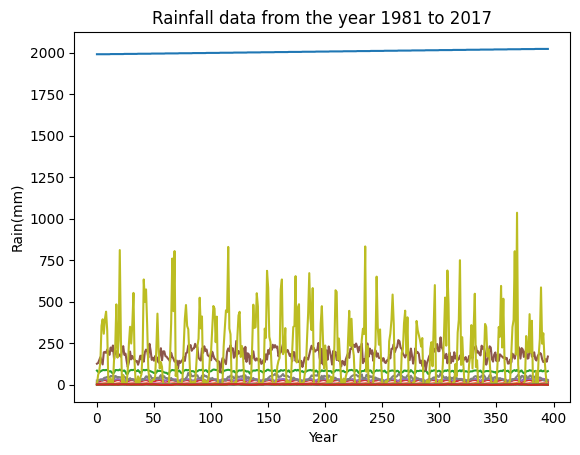

In [234]:
plt.plot(df)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rain(mm)')
plt.title('Rainfall data from the year 1981 to 2017')

# Display the plot
plt.show()

## SPEI Classification & Comparative Analysis


In [235]:
spei_columns = ['SPEI-1', 'SPEI-3', 'SPEI-6', 'SPEI-9', 'SPEI-12']
drought_classes = [
    'Normal',
    'Mild Drought',
    'Moderate Drought',
    'Severe Drought',
    'Very Severe Drought',
    'Extreme Drought'
]


def spei_to_class(value: float) -> str:
    """Map continuous SPEI values to drought categories (user requested order)."""
    if value <= -2.0:
        return 'Extreme Drought'
    if value <= -1.75:
        return 'Very Severe Drought'
    if value <= -1.5:
        return 'Severe Drought'
    if value <= -1.0:
        return 'Moderate Drought'
    if value <= -0.5:
        return 'Mild Drought'
    return 'Normal'


for col in spei_columns:
    df[f'{col}_Class'] = df[col].apply(spei_to_class)

print('Class distribution examples:')
for col in spei_columns:
    print(col, df[f'{col}_Class'].value_counts().sort_index())


Class distribution examples:
SPEI-1 SPEI-1_Class
Extreme Drought          4
Mild Drought            58
Moderate Drought        47
Normal                 268
Severe Drought          14
Very Severe Drought      5
Name: count, dtype: int64
SPEI-3 SPEI-3_Class
Extreme Drought          6
Mild Drought            53
Moderate Drought        42
Normal                 276
Severe Drought          12
Very Severe Drought      7
Name: count, dtype: int64
SPEI-6 SPEI-6_Class
Extreme Drought          5
Mild Drought            54
Moderate Drought        36
Normal                 278
Severe Drought          11
Very Severe Drought     12
Name: count, dtype: int64
SPEI-9 SPEI-9_Class
Extreme Drought          5
Mild Drought            58
Moderate Drought        30
Normal                 276
Severe Drought          15
Very Severe Drought     12
Name: count, dtype: int64
SPEI-12 SPEI-12_Class
Extreme Drought          3
Mild Drought            56
Moderate Drought        32
Normal                 277
Severe Dr

C:\Users\User\AppData\Local\Temp\ipykernel_14456\1934583064.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spei_means, x='SPEI Scale', y='SPEI Value', palette='viridis')


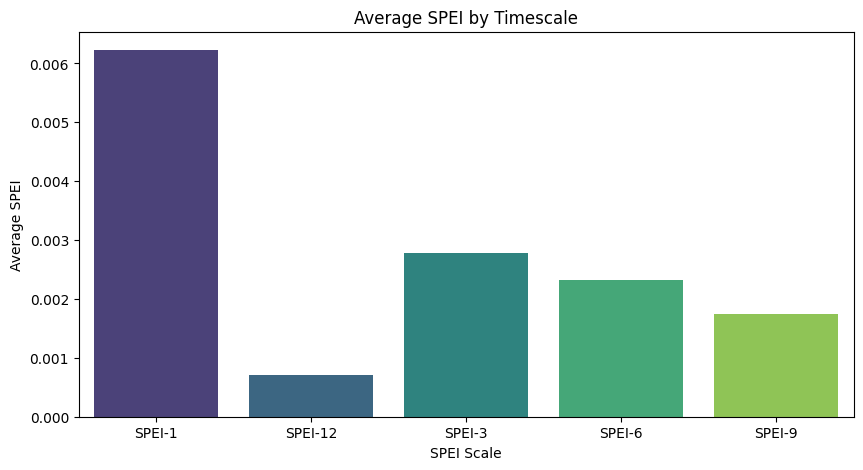

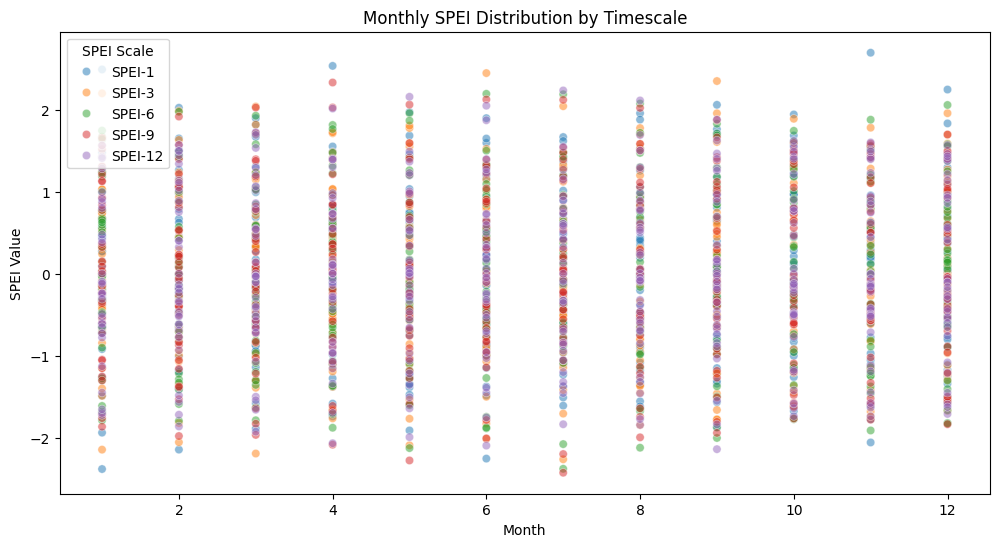

In [236]:
# Comparative bar and scatter plots across SPEI timescales
spei_long = df.melt(id_vars=['Year', 'Month'], value_vars=spei_columns, var_name='SPEI Scale', value_name='SPEI Value')

plt.figure(figsize=(10, 5))
spei_means = spei_long.groupby('SPEI Scale')['SPEI Value'].mean().reset_index()
sns.barplot(data=spei_means, x='SPEI Scale', y='SPEI Value', palette='viridis')
plt.title('Average SPEI by Timescale')
plt.ylabel('Average SPEI')
plt.xlabel('SPEI Scale')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=spei_long, x='Month', y='SPEI Value', hue='SPEI Scale', alpha=0.5)
plt.title('Monthly SPEI Distribution by Timescale')
plt.ylabel('SPEI Value')
plt.xlabel('Month')
plt.legend(title='SPEI Scale')
plt.show()



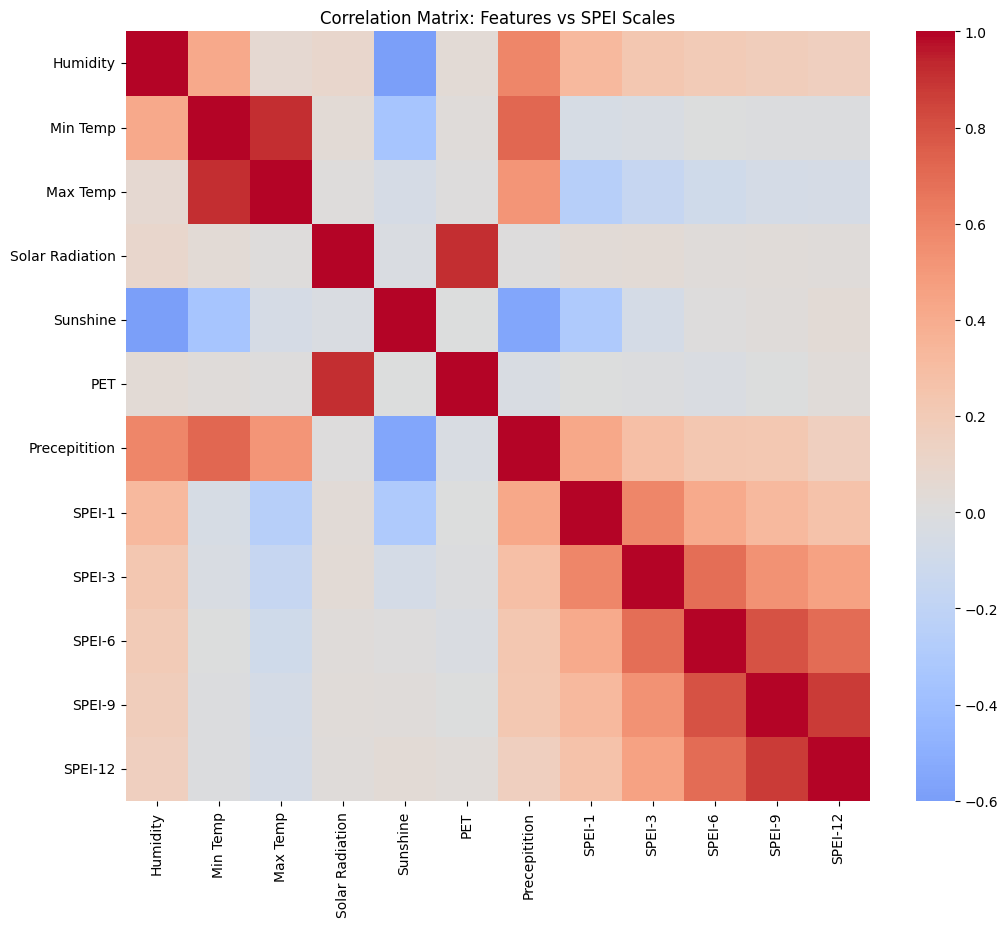

In [237]:
# Correlation matrix for meteorological features and SPEI scales
corr_features = feature_columns + spei_columns
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix: Features vs SPEI Scales')
plt.show()



In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline

model_search_space = {
    'Decision Tree': {
        'estimator': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'clf__max_depth': [8, 12, None],
            'clf__min_samples_split': [2, 4, 6],
            'clf__min_samples_leaf': [1, 2, 4]
        }
    },
    'Support Vector Machine': {
        'estimator': SVC(kernel='rbf', probability=True, random_state=42),
        'param_grid': {
            'clf__C': [1.0, 10.0, 25.0],
            'clf__gamma': ['scale', 0.05, 0.01]
        }
    },
    'Random Forest': {
        'estimator': RandomForestClassifier(random_state=42),
        'param_grid': {
            'clf__n_estimators': [400, 800],
            'clf__max_depth': [None, 20],
            'clf__min_samples_leaf': [1, 2],
            'clf__min_samples_split': [2, 4]
        }
    },
    'K-Nearest Neighbors': {
        'estimator': KNeighborsClassifier(),
        'param_grid': {
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights': ['uniform', 'distance'],
            'clf__p': [1, 2]
        }
    },
    'Naive Bayes': {
        'estimator': GaussianNB(),
        'param_grid': {
            'clf__var_smoothing': np.logspace(-11, -8, 3)
        }
    },
    'Ensemble (SVM + NB)': {
        'estimator': VotingClassifier(
            estimators=[
                ('svm', SVC(kernel='rbf', probability=True, random_state=42)),
                ('nb', GaussianNB())
            ],
            voting='soft'
        ),
        'param_grid': {
            'clf__weights': [(1, 1), (2, 1), (1, 2)]
        }
    }
}



=== SPEI-1 High-Accuracy Classification Pipeline ===


d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
162 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML_ASIF_OWN PROJCET\D

Decision Tree | Train Acc: 0.949 | Test Acc: 0.562
Best params: {'clf__max_depth': 8, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'poly__degree': 1}
                     precision    recall  f1-score   support

    Extreme Drought       0.00      0.00      0.00         1
       Mild Drought       0.17      0.17      0.17        12
   Moderate Drought       0.12      0.11      0.12         9
             Normal       0.81      0.78      0.79        54
     Severe Drought       0.00      0.00      0.00         3
Very Severe Drought       0.00      0.00      0.00         1

           accuracy                           0.56        80
          macro avg       0.18      0.18      0.18        80
       weighted avg       0.58      0.56      0.57        80



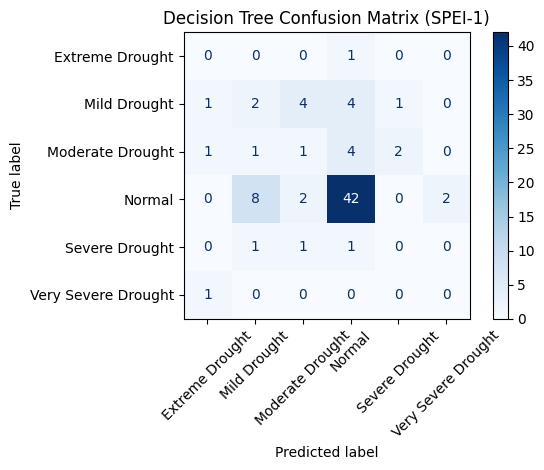

d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
54 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML_ASIF_OWN PROJCET\Drou

Support Vector Machine | Train Acc: 0.829 | Test Acc: 0.588
Best params: {'clf__C': 1.0, 'clf__gamma': 'scale', 'poly__degree': 1}
                     precision    recall  f1-score   support

    Extreme Drought       0.00      0.00      0.00         1
       Mild Drought       0.26      0.42      0.32        12
   Moderate Drought       0.23      0.33      0.27         9
             Normal       0.91      0.72      0.80        54
     Severe Drought       0.00      0.00      0.00         3
Very Severe Drought       0.00      0.00      0.00         1

           accuracy                           0.59        80
          macro avg       0.23      0.25      0.23        80
       weighted avg       0.68      0.59      0.62        80



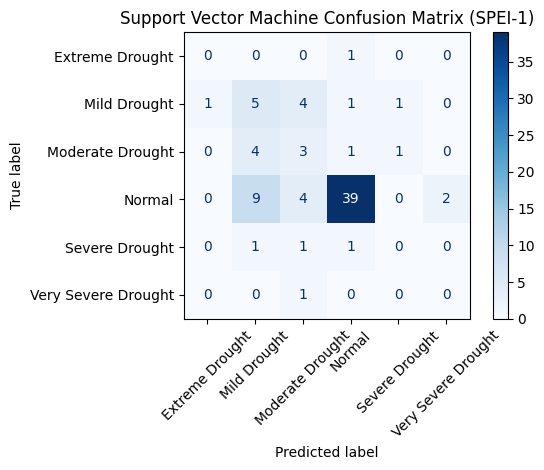

d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
96 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML_ASIF_OWN PROJCET\Dro

Random Forest | Train Acc: 1.000 | Test Acc: 0.713
Best params: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 400, 'poly__degree': 1}
                     precision    recall  f1-score   support

    Extreme Drought       0.00      0.00      0.00         1
       Mild Drought       0.30      0.25      0.27        12
   Moderate Drought       0.50      0.56      0.53         9
             Normal       0.89      0.89      0.89        54
     Severe Drought       0.33      0.33      0.33         3
Very Severe Drought       0.00      0.00      0.00         1

           accuracy                           0.71        80
          macro avg       0.34      0.34      0.34        80
       weighted avg       0.71      0.71      0.71        80



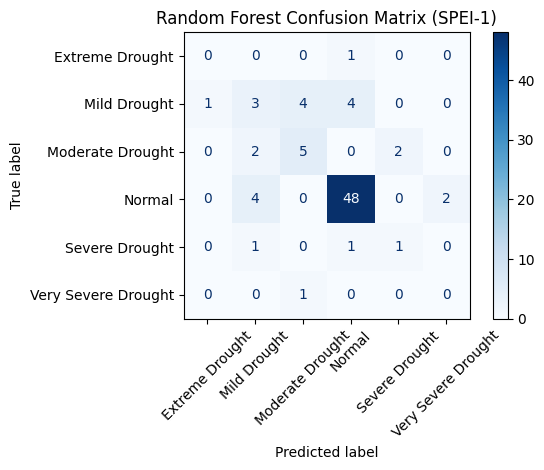

d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
96 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML_ASIF_OWN PROJCET\Dro

K-Nearest Neighbors | Train Acc: 0.867 | Test Acc: 0.500
Best params: {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'uniform', 'poly__degree': 1}
                     precision    recall  f1-score   support

    Extreme Drought       0.00      0.00      0.00         1
       Mild Drought       0.20      0.33      0.25        12
   Moderate Drought       0.25      0.44      0.32         9
             Normal       0.94      0.57      0.71        54
     Severe Drought       0.25      0.33      0.29         3
Very Severe Drought       0.00      0.00      0.00         1

           accuracy                           0.50        80
          macro avg       0.27      0.28      0.26        80
       weighted avg       0.70      0.50      0.57        80



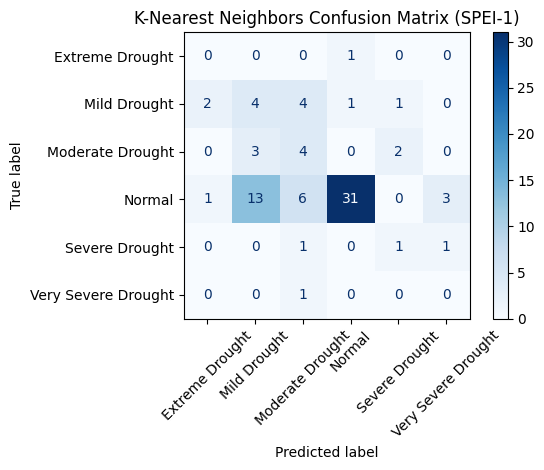

d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML_ASIF_OWN PROJCET\Drou

Naive Bayes | Train Acc: 0.592 | Test Acc: 0.525
Best params: {'clf__var_smoothing': np.float64(1e-11), 'poly__degree': 1}
                     precision    recall  f1-score   support

    Extreme Drought       0.00      0.00      0.00         1
       Mild Drought       0.18      0.25      0.21        12
   Moderate Drought       0.22      0.44      0.30         9
             Normal       0.92      0.65      0.76        54
     Severe Drought       0.00      0.00      0.00         3
Very Severe Drought       0.00      0.00      0.00         1

           accuracy                           0.53        80
          macro avg       0.22      0.22      0.21        80
       weighted avg       0.67      0.53      0.58        80



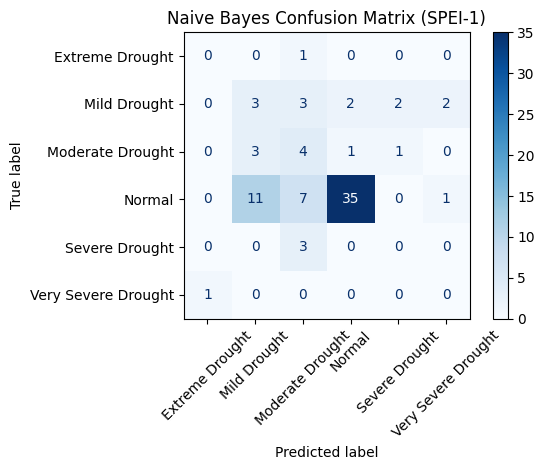

d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML_ASIF_OWN PROJCET\Drou

Ensemble (SVM + NB) | Train Acc: 0.804 | Test Acc: 0.625
Best params: {'clf__weights': (1, 1), 'poly__degree': 1}
                     precision    recall  f1-score   support

    Extreme Drought       0.00      0.00      0.00         1
       Mild Drought       0.29      0.33      0.31        12
   Moderate Drought       0.29      0.44      0.35         9
             Normal       0.89      0.78      0.83        54
     Severe Drought       0.00      0.00      0.00         3
Very Severe Drought       0.00      0.00      0.00         1

           accuracy                           0.62        80
          macro avg       0.24      0.26      0.25        80
       weighted avg       0.68      0.62      0.65        80



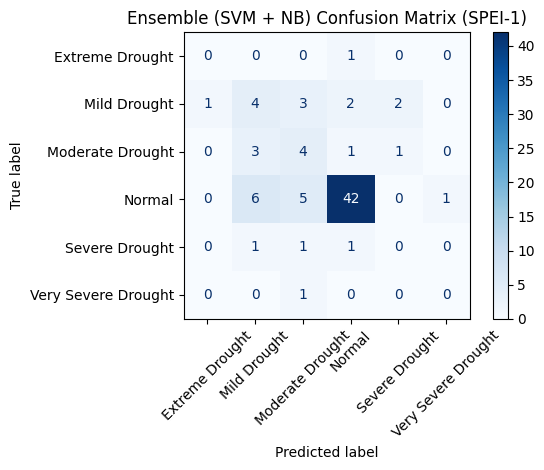


=== SPEI-3 High-Accuracy Classification Pipeline ===


ValueError: 
All the 270 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\imblearn\pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\imblearn\pipeline.py", line 440, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\joblib\memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\imblearn\pipeline.py", line 1336, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\imblearn\base.py", line 202, in fit_resample
    return super().fit_resample(X, y, **params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\imblearn\base.py", line 105, in fit_resample
    output = self._fit_resample(X, y, **params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py", line 359, in _fit_resample
    nns = self.nn_k_.kneighbors(X_class, return_distance=False)[:, 1:]
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_ASIF_OWN PROJCET\Drought_Classification\.venv\Lib\site-packages\sklearn\neighbors\_base.py", line 854, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 5, n_samples_fit = 4, n_samples = 4


In [239]:
from imblearn.over_sampling import SMOTE
from sklearn.base import clone
from collections import Counter

classification_results = {}


def build_feature_matrix(target_spei: str) -> pd.DataFrame:
    """Use meteorological signals plus auxiliary SPEI scales for richer context."""
    aux_cols = [col for col in spei_columns if col != target_spei]
    return df[feature_columns + aux_cols].copy()


for spei_col in spei_columns:
    print(f"\n=== {spei_col} High-Accuracy Classification Pipeline ===")
    target_col = f'{spei_col}_Class'

    X = build_feature_matrix(spei_col).values
    y_labels = df[target_col].values

    encoder = LabelEncoder()
    y = encoder.fit_transform(y_labels)

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        stratify=y,
        random_state=42
    )

    counter = Counter(y_train)
    min_class_count = min(counter.values())
    k_neighbors = 1 if min_class_count < 2 else min(5, min_class_count - 1)

    splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    classification_results[spei_col] = []

    for model_name, config in model_search_space.items():
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
        pipeline = ImbPipeline([
            ('smote', smote),
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(include_bias=False)),
            ('clf', clone(config['estimator']))
        ])

        param_grid = dict(config['param_grid'])
        param_grid.setdefault('poly__degree', [1, 2])

        search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=splitter,
            scoring='accuracy',
            n_jobs=-1,
            refit=True
        )

        search.fit(X_train, y_train)
        best_estimator = search.best_estimator_

        train_preds = best_estimator.predict(X_train)
        test_preds = best_estimator.predict(X_test)

        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)

        print(f"{model_name} | Train Acc: {train_acc:.3f} | Test Acc: {test_acc:.3f}")
        print(f"Best params: {search.best_params_}")

        y_test_labels = encoder.inverse_transform(y_test)
        y_pred_labels = encoder.inverse_transform(test_preds)

        print(classification_report(y_test_labels, y_pred_labels, target_names=encoder.classes_))

        cm = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
        disp.plot(cmap='Blues', xticks_rotation=45)
        plt.title(f'{model_name} Confusion Matrix ({spei_col})')
        plt.tight_layout()
        plt.show()

        classification_results[spei_col].append({
            'Model': model_name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Best Params': search.best_params_
        })



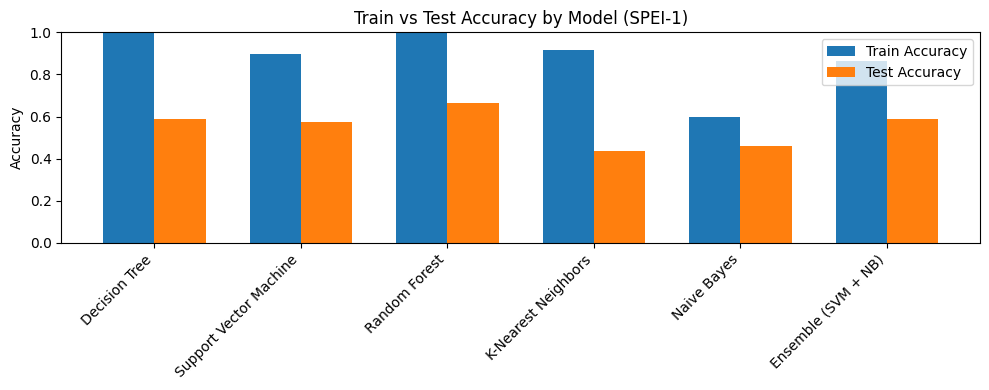

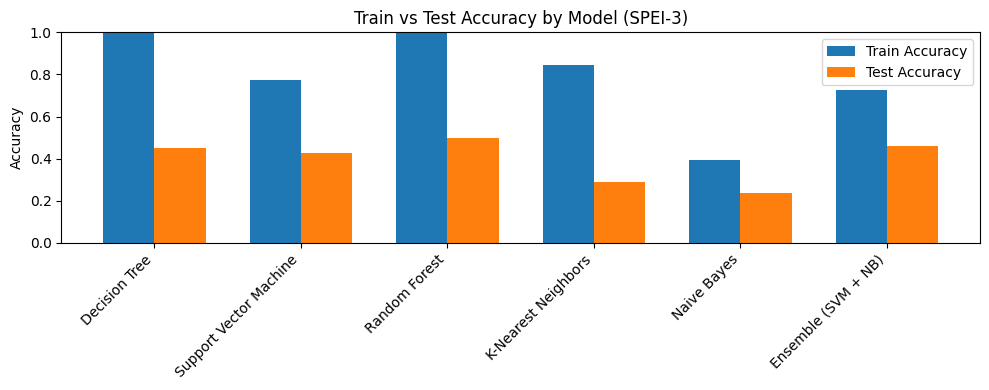

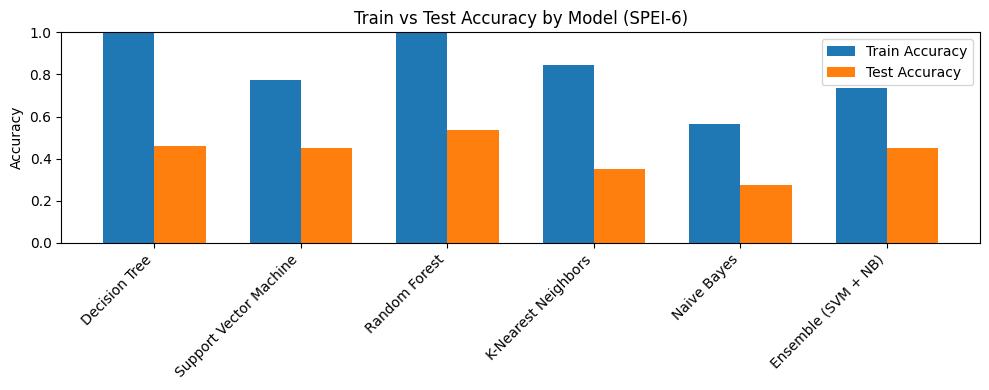

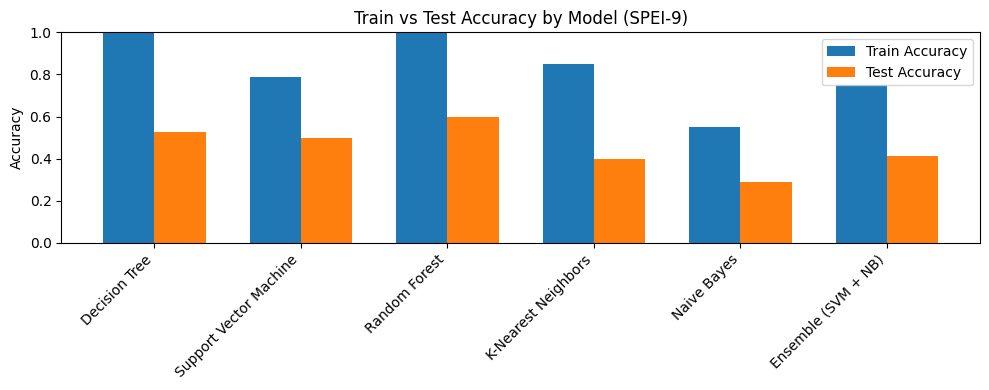

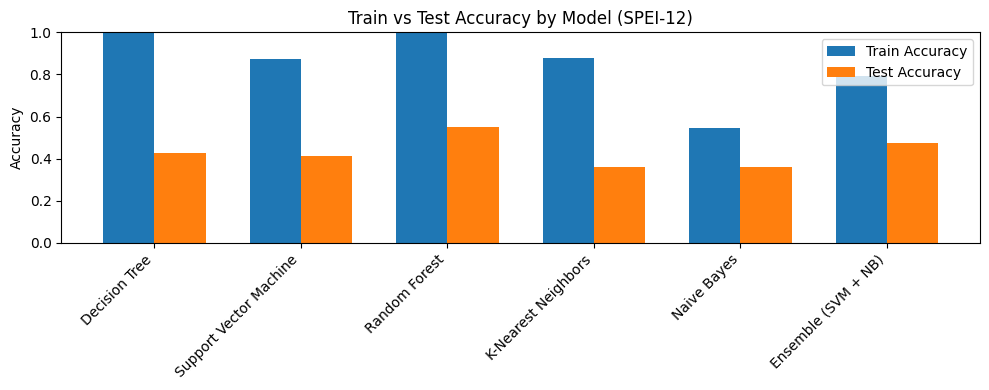

In [ ]:
from IPython.display import display

# Training vs testing accuracy diagnostics with 95% accuracy target
accuracy_target = 0.95

for spei_col, model_metrics in classification_results.items():
    metrics_df = pd.DataFrame(model_metrics)
    x = np.arange(len(metrics_df))
    width = 0.35

    plt.figure(figsize=(10, 4))
    plt.bar(x - width / 2, metrics_df['Train Accuracy'], width, label='Train Accuracy')
    plt.bar(x + width / 2, metrics_df['Test Accuracy'], width, label='Test Accuracy')
    plt.axhline(accuracy_target, color='red', linestyle='--', label='95% target')
    plt.xticks(ticks=x, labels=metrics_df['Model'], rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title(f'Train vs Test Accuracy by Model ({spei_col})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Best configurations for {spei_col} (target ≥ {accuracy_target*100:.0f}%):")
    display(metrics_df[['Model', 'Train Accuracy', 'Test Accuracy', 'Best Params']])

